# Linear Regression

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Seaborn : Library for Data Visualization 
> Matplotlib : Library for Data Visualization 

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

In [5]:
heartData= pd.read_csv("dataset/heart.csv")
heartData.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


---

## Problem 1 : Predicting Cholestrol using Age

Extract the required variables from the dataset, as mentioned in the problem.   

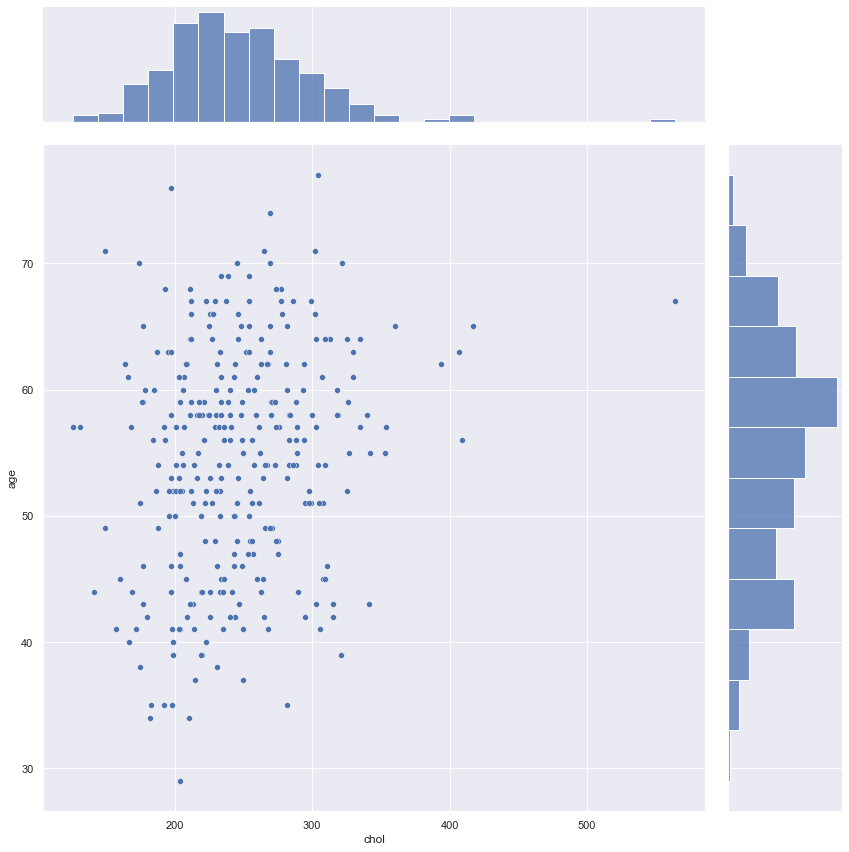

In [6]:
cholestrol = pd.DataFrame(heartData['chol'])
age = pd.DataFrame(heartData['age'])
trainDF = pd.concat([cholestrol,age],axis=1).reindex(cholestrol.index)
sb.jointplot(data=trainDF,x='chol',y='age',height=12)

Import the `LinearRegression` model from `sklearn.linear_model`.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Create a `LinearRegression` object

In [10]:
linreg = LinearRegression()

Prepare both the datasets by splitting in Train and Test sets.   
Train Set with 250 samples and Test Set with 53 samples.

In [12]:
chol_train,chol_test,age_train,age_test = train_test_split(cholestrol,age,train_size=250/303)

# Check the sample sizes
print("Train Set :", chol_train.shape, age_train.shape)
print("Test Set  :", chol_test.shape, age_test.shape)

Train Set : (250, 1) (250, 1)
Test Set  : (53, 1) (53, 1)


Fit `LinearRegression` model on `chol_train` and `age_train`

In [13]:
linreg.fit(age_train,chol_train)

LinearRegression()

Visual Representation of our linear regression model

In [14]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [173.86719769]
Coefficients 	: a =  [[1.33671039]]


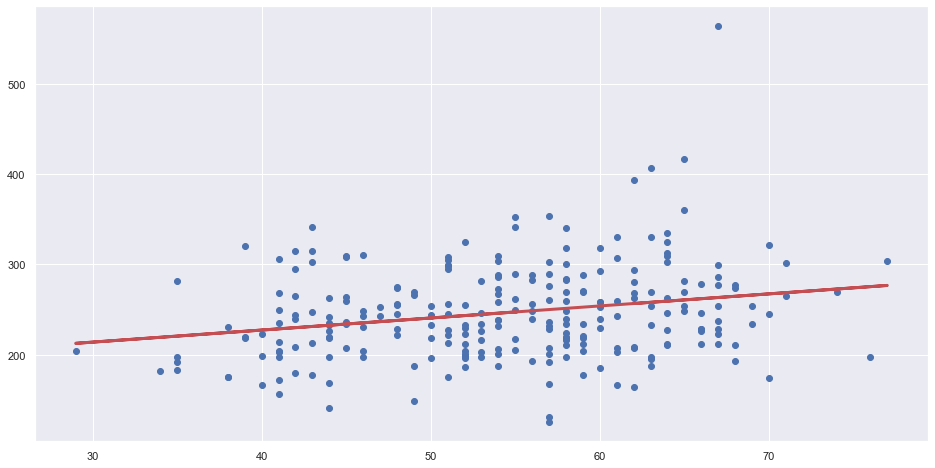

In [17]:
regline_x = age_train.to_numpy()
regline_y = linreg.coef_*regline_x + linreg.intercept_

f = plt.figure(figsize=(16, 8))
plt.scatter(age_train,chol_train)
plt.plot(regline_x, regline_y, "r-", linewidth = 3)
plt.show()

Predicting `cholestrol` given age in test data

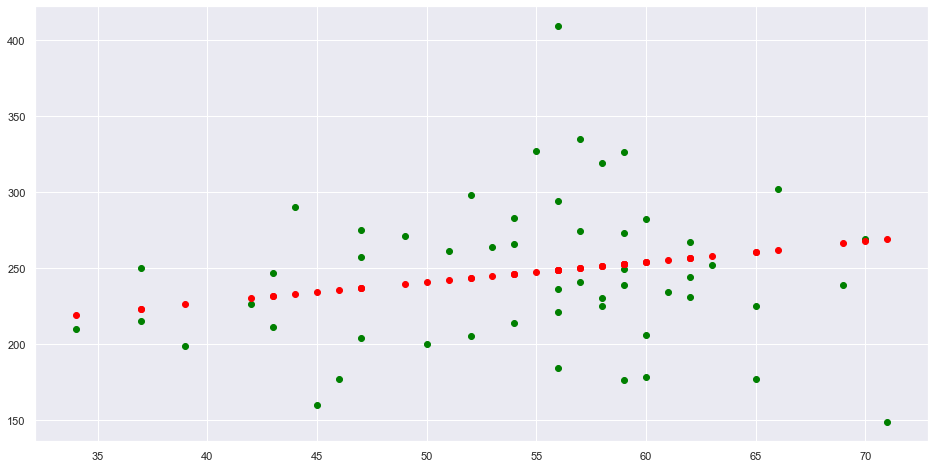

In [20]:
chol_test_pred = linreg.predict(age_test)

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(age_test, chol_test, color = "green")
plt.scatter(age_test, chol_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model
Metric : Explained variance on the train set

In [22]:
print("Explained Variance (R^2) \t:", linreg.score(age_train, chol_train))

Explained Variance (R^2) 	: 0.05503288159200981


Metric: Explained variance on the test set


In [23]:
print("Explained Variance (R^2) \t:", linreg.score(age_train, chol_train))

Explained Variance (R^2) 	: 0.05503288159200981
